In [1]:
import numpy as np
import sympy as sp
import shared_functions as sf
from IPython.display import HTML
import matplotlib.pyplot as plt

So far we have explored signed area, its derived formulas, given a sense of what we can expect from circles. When we did did the formula, recall we ended with exploring that parameterisation inw hcih successive splines became smaller and smaller. We are becomeing core about to sum things. IN this notebook we will  A series of splines, we sum together moves, until revistint arithmetic and thinking more methodoically around hwo  we detail add things. And how we add lots of nubmers. 

We should say sequence series are different. A seuquence is just a list. But if we sum elemetns, we get a series

The purpose of this ntobook, needing nomenclature, in the same way we created some data strcutures, we can also look at. Partly this will be a bit of a review. Consider this: 

$$   \sum_{k=1}^n (k + 1)   $$




There are components of this symbol, a <i>lower bound</i>, here $k=1$ at the bottom of summation Sigma symbol, and the <i>upper bound</i>. The expression, here $ (k + 1)$, is called the <i>summand</i> 




There is a really nice way to do this in Python: list comprehensions! Let's write a python version fo the following 4 examples: 

1. $\sum_{k=1}^4 2^2$ <br/>
2. $\sum_{i=0}^3 2^i$ <br/>
3. $\sum_{j=1}^5 \frac{j-1}{2}$<br/>
4. $\sum_{i=1}^8 i^3$ 


In [2]:
print(sum([2^2 for i in np.arange(1, 5, 1)]))
print(sum([2^i for i in np.arange(0, 4, 1)]))
print(sum([(j - 1)/2 for j in np.arange(1, 6, 1)]))
print(sum([i^3 for i in np.arange(1, 9, 1)]))

16
15
5.0
1296


Let's try and example but this time, let's create a general summation function in python to help us. It will take an upper bound and lower bound, and a sympy expression summand with a any single variable, and return a list with 2 elements, the list that has been created, and the sum: 

In [8]:
def compute_summation(lower_bound = 0, upper_bound = 0, summand = ""):
    unknown_variable = list(summand.free_symbols)[0]
    list_for_summation = [summand.subs(unknown_variable, index_value) for index_value in np.arange(lower_bound, upper_bound, 1)]
    return([list_for_summation, sum(list_for_summation)])


t = sp.symbols('t')
compute_summation(lower_bound=0,upper_bound=10, summand= t + 9)

[[9, 10, 11, 12, 13, 14, 15, 16, 17, 18], 135]

We will also enforce the following definitions: <br/><br/>

1. $  \sum_{i=1}^n 1=n  $<br/><br/>

2. $  \sum_{i=1}^n (a_i+b_i)=\sum_{i=1}^n a_i+\sum_{i=1}^n b_i $<br/><br/>

3. $  \sum_{i=1}^n (a_i-b_i)=\sum_{i=1}^n a_i-\sum_{i=1}^n b_i$<br/><br/>

4. $  \sum_{i=1}^n ca_i=c\sum_{i=1}^n a_i $<br/><br/>

5. $  \sum_{i=1}^n a_i=\sum_{j=0}^{n-1} a_{j+1}  $ <br/><br/>

A few things to note: we can think of summation notation in an algebraic way. that we also treat this more algebraically. Consider the follwing example (where $ \sum_{j=1}^7a_j=12 $ and $ \sum_{j=1}^7 b_j=9$:

$$  \sum_{j=1}^7(2a_j-3b_j+4), $$  

The first thing we can do is use defintion 2 and definition 4 above to rewrite things: 

$$  2\sum_{j=1}^7a_j-3\sum_{j=1}^7b_j+ 4 \sum_{j=1}^71$$

And we know that $ \sum_{j=1}^7a_j=12 $ and $ \sum_{j=1}^7 b_j=9$, so we can use algebraic subsitution to rewrite this as: 

$$  2\times 12-3\times 9+4\times 7=25. $$

When we change an summatin index, note the key definition here, 5, is: $\sum_{i=1}^n a_i=\sum_{j=0}^{n-1} a_{j+1}  $, notning is obtained by setting $j=i−1$ and noting that as $i$ runs from $1$ to $n$, $j$ runs from $0$ to $n−1$.

Of the defintions above, this one feels a little strange when you first encounter it. So let's work through a few examples of that.

Suppose we have some sum and we are asked change the lower bound so it is 3. Here is the sum: 

$$  \sum_{j=1}^{57} (2j-1) $$

The way to do this is change the sum notation from the form $\sum_{j=1}^{57}$ to use an indice of $i$, to become $\sum_{i=?}^{?}$. 

If the lower bound is to become 3 (which means increase by $2$ from $j = 1$) then there  $3$, this means there is a relationship between $i$ this means that $j=1$ becomes $i = j + 2$. 

Deal with the summation sybolv first. The lower bound of 2 can be represented as $\sum_{i=3}^{59}$. 

Then we just need to apply the subsitution throughout the epression of $i = j + 2$. 

$$ \sum_{j=1}^{57} (2j-1)=\sum_{i=3}^{57+2} (2(i-2)-1)=\sum_{i=3}^{59}(2i-5). $$

Let's do another example. For the sum $  \sum_{j=1}^{57} (2j-1) $, Change the upper bound by 58. 

To do this, we have a new index $i$ and note that $i = j + 1$. The increase of upper bound is $1$. Then update our summation sumbol to $\sum_{i=2}^{58}$ and use this relationship between between $i$ and $j$ to update the summation 

$$  \sum_{j=1}^{57} (2j-1)=\sum_{i=2}^{57+1} (2(i-1)-1)=\sum_{i=2}^{58}(2i-3). $$

Let's do a slightly more complicated example, where we will focus on the <i>summand</i> changing form. For exxample, shift the summation indexes so the summand of $  \sum_{j=1}^{57} (2j-1) $ is $(2k + 1)$. 

The first thing to do is set up a relationship between our original index and new index. We note that $2j-1=2k+1$. This means that $k=j-1$. 

Then just proceed as before: 

$$  \sum_{j=1}^{57} (2j-1)=\sum_{k=0}^{56}(2k+1). $$



What we are seeing here is a powerful technology that allows speed up computation, and gives us a symbol to capture this idea. In a sense it is similair to $\sqrt{2}$ that does not give us an answer but rather indicates that there is it is impossibel to embark on on computation. HOwever, the summation symbol is somewhat more sophisticated. It can tell us how much computation is needed if there is an upper bound. 

There are two powerful ideas in mathematics here: the first is about how much we can compress information  to express unambiguous computation. In the same way we can express compressed addition  4 + 4 + 4 + 4 with 4 x 4. These ideas are not only powerful in calculus but across other types of information as well. 

We can of coruse create any sum we want using this approach, but it is worth noting some important sums that we can explore. The first is the sum of natural numbers: 

<b>Sum of natural numbers</b><br/>
$$  1+2+3+\ldots+n=\sum_{k=1}^n k=\frac {n(n+1)}{2}.$$


<b>Sum of natural quadratic numbers</b><br/>

$$ 1 + 2^2 + 3^2 + 4^2 \ldots + n = \sum_{i=1}^n i^2=\frac{n(n+1)(2n+1)}{6} $$

<b>Su of cubes of natural numbers</b><br/>

$$  1^2+2^2+3^2+\ldots+n^2=\sum_{k=1}^n k^2=\frac {n(n+1)(2n+1)}{6} $$

Formal proofs of thesee can be found here. We can also use these formulas to create. Let's create the triangle mumbers

In [17]:
t = sp.symbols('t')
e = (t * (t + 1)) / 2
compute_summation(lower_bound=1, upper_bound=10, summand=(e))

[[1, 3, 6, 10, 15, 21, 28, 36, 45], 165]

And quadratic numbers: 

In [21]:
t = sp.symbols('t')
e = (t * (t + 1) * (2 * t + 1) / 6)
compute_summation(lower_bound=1, upper_bound=10, summand=(e))

[[1, 5, 14, 30, 55, 91, 140, 204, 285], 825]

And finally cubics

In [23]:
t = sp.symbols('t')
e = ((t * (t + 1))/ 2)^2
compute_summation(lower_bound=1, upper_bound=10, summand=(e))

[[1, 9, 36, 100, 225, 441, 784, 1296, 2025], 4917]

<b>Telescoping Series</b>

As well as important sums that come up alot, there are also special kinds of summation, when certain characteristics. One of these is a telesclping series. 

To get a telescoping series we need to do things. 

1. Start with a known sequence, $a_1,a_2, \cdots, a_n$ for some natural number $n \gt 1$
2. Create a second sequence of sucessing differences: $b_1=a_2-a_1, \quad b_2=a_3-a_2,\quad \ldots,\quad b_{n-1}$

It turns out that this approach creates te follwoing identity

$$\sum_{i=1}^{n-1} b_i=a_n-a_1.$$

It's fairly trivial to prove this, details are here




<b>Arithmetic Sequences</b>

$$  a_1+a_2+\ldots+a_n=\sum_{i=1}^n a_i=\frac{n(a_1+a_n)}{2}.  $$

<b>Geometric series<b/>
    
    $$ a_1+a_2+\ldots+a_n=\sum_{i=1}^n a_i=\frac{n(a_1+a_n)}{2}. $$ 
    
    constant ratio involved

$$  a_1+a_2+\ldots+a_n=\sum_{k=1}^n a_k=\frac{a_1(r^n-1)}{r-1}, \quad \text{when} \quad r\neq 1. $$


Finally, let's wrap with a few examples of summation notation: 

notes....

interested in summing things - heart of of integral calculus - summing polygonal first, summying curved regions. think back to multiplication as compressed addition

summation - euclid 1 + 2 + 3....n

then Arhimedes - sum of squares

then Nicomarchus - sum of 1^3 + 2 ^3 etc.....which is square of Euclid 

these very important for calculus.....

interesting to generalise formulas to higher powers - kth power

before that - summation notion, allows to work in structured say, summation supposes a sequence, anything we can add with and index
...note bouns 1:n - should be natural numbers, but we can start from 0 or subsets - bounds can be variables - note rules....

So can exress sums of powers - sequence and series are different...sequence, just a list....arithmtetic sequence have constant difference - geometric sequence is

problem og getting control of sums of powers - how do we get at this




NameError: name 'compute_parameterised_point_from_circle' is not defined

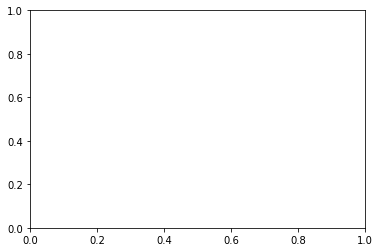

In [5]:
fig, ax = plt.subplots()
# points for circle



points_choice = np.array([compute_parameterised_point_from_circle(i) for i in np.arange(0,-10, -.25)])
#points_for_plotting = np.append(points_choice, [points_choice[0]], axis=0)
x1 = [e[0] for e in points_choice]
y1 = [e[1] for e in points_choice]


initial_values = np.arange(start=-200, stop=200, step=.01)
circle_coords = [compute_parameterised_point_from_circle(i) for i in initial_values]
x2 = [e[0] for e in circle_coords]
y2 = [e[1] for e in circle_coords]


ax.axis('equal')

ax.plot(x2, y2, 'b')
ax.plot(x1, y1, 'r')
ax.plot(x1, y1, 'ro')